# PyTorch hardware benchmark analysis

Single node throughput comparisons between different hardware options at NERSC.

In [1]:
import os
import re
import glob

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
version = 'v1.2.0'
pattern = '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/*-%s-n1/results.txt' % version

In [5]:
results_files = glob.glob(pattern)

results_files

['/global/cscratch1/sd/sfarrell/pytorch-benchmarks/gpu-v1.2.0-n1/results.txt',
 '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/hsw-v1.2.0-n1/results.txt']

In [6]:
results = [pd.read_csv(f, delim_whitespace=True) for f in results_files]
results = pd.concat(results, ignore_index=True)

results

,train_rate,inference_rate,ranks,hardware,version,model
0,182.525779,635.350850,1,gpu,v1.2.0,inceptionV3
1,5061.086456,14818.019022,1,gpu,v1.2.0,lstm
2,460.914036,2613.454798,1,gpu,v1.2.0,alexnet
3,247.850647,894.464710,1,gpu,v1.2.0,resnet50
4,196.265852,1043.327016,1,gpu,v1.2.0,vgg11
5,837.224941,5208.378940,1,gpu,v1.2.0,cnn3d
6,13.557418,47.904272,1,hsw,v1.2.0,inceptionV3
7,362.557148,796.934826,1,hsw,v1.2.0,lstm
8,203.419221,714.774127,1,hsw,v1.2.0,alexnet
9,14.629206,50.253714,1,hsw,v1.2.0,resnet50


## Tables

In [7]:
# Training rate per hardware
results.groupby('model').apply(lambda g: pd.Series(data=g.train_rate.values, index=g.hardware))

hardware,gpu,hsw
model,,
alexnet,460.914036,203.419221
cnn3d,837.224941,191.446156
inceptionV3,182.525779,13.557418
lstm,5061.086456,362.557148
resnet50,247.850647,14.629206
vgg11,196.265852,20.162038


In [8]:
# Evaluation rate per hardware
results.groupby('model').apply(lambda g: pd.Series(data=g.inference_rate.values, index=g.hardware))

hardware,gpu,hsw
model,,
alexnet,2613.454798,714.774127
cnn3d,5208.378940,406.663932
inceptionV3,635.350850,47.904272
lstm,14818.019022,796.934826
resnet50,894.464710,50.253714
vgg11,1043.327016,62.550474


## Training throughput comparisons

In [9]:
models = ['alexnet', 'vgg11', 'inceptionV3', 'resnet50', 'cnn3d', 'lstm']
results_by_model = results.groupby('model')

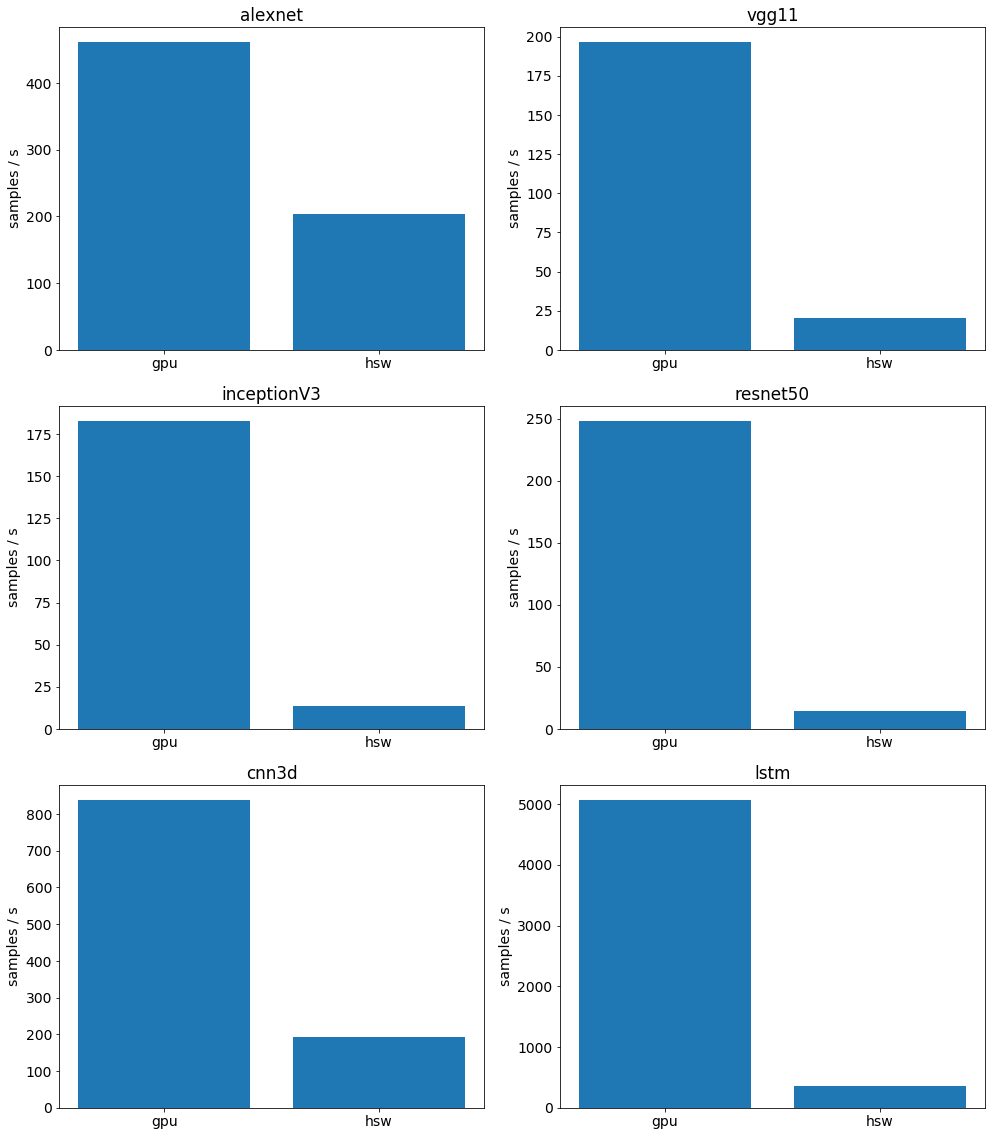

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results_by_model.get_group(model)
    ax.bar(model_results.hardware, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()